## Week7 Part One CADL¶

Based on **nan_Week-7-CADL-Lecture2** the **the image inpainting**

The homework link for the CADL Lecture2: [link](https://github.com/pkmital/CADL/blob/41e222d359f7a37b0b81c4216d011bf1fd1c42fb/session-2/session-2.ipynb)

In this exercise, I not only learn tf graph and image manipulations but also explored different set ups on neural networks, such as deep but narrow and shallow but wide networks, and the corresponding results.
## Notes
1. remember to reset the tf graph
2. img asarray
3. the GIF writer function is not available, maybe use `imageio.mimsave` instead; although it's still working

## Explore
1. in the optimizer, change the learning rate, 0.001, 0.01, 0.1 etc
2. change the batch_size
3. change the cost function, but the tf1 doesn't have tf.square_difference....
4. shallow net but wide neurons(1-2 layers, >100 neurons) -> quite good
5. deep net but narrow (6-20 layers, fewer neurons<20)-> not good


In [152]:
#import
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import data #https://scikit-image.org/docs/dev/api/skimage.data.html
from PIL import Image#to replace the scipy imsave & resize
from numpy import asarray 
import imageio

In [103]:
#import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [104]:
#import libraries from CADL
from libs import utils, gif
import IPython.display as ipyd


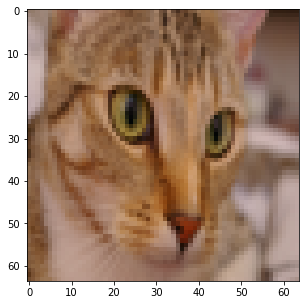

In [156]:
# First load an image
cat = data.chelsea()
img_temp = Image.fromarray(cat)
# Be careful with the size of your image.
# Try a fairly small image to begin with,
# then come back here and try larger sizes.
img_temp = img_temp.resize(size = (64, 64))
imgCat = asarray(img_temp) #important
plt.figure(figsize=(5, 5))
plt.imshow(imgCat)

# Make sure you save this image as "reference.png"
# and include it in your zipped submission file
# so we can tell what image you are trying to paint!
plt.imsave(fname='reference.png', arr=imgCat)

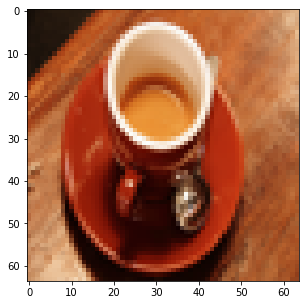

In [213]:
# tried another image
coffee = data.coffee()
img_temp = Image.fromarray(coffee)
img_temp = img_temp.resize(size = (64, 64))
imgCoffee = asarray(img_temp) #important
plt.figure(figsize=(5, 5))
plt.imshow(imgCoffee)
plt.imsave(fname='reference2.png', arr=imgCoffee)

In [215]:
def split_image(img):
    # We'll first collect all the positions in the image in our list, xs
    xs = []

    # And the corresponding colors for each of these positions
    ys = []

    # Now loop over the image
    for row_i in range(img.shape[0]):
        for col_i in range(img.shape[1]):
            # And store the inputs
            xs.append([row_i, col_i])
            # And outputs that the network needs to learn to predict
            ys.append(img[row_i, col_i])

    # we'll convert our lists to arrays
    xs = np.array(xs)
    ys = np.array(ys)
    return xs, ys

In [216]:
xs, ys = split_image(imgCat)
xs2,ys2 = split_image(imgCoffee)
# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

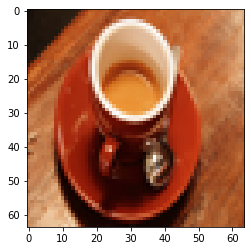

In [230]:
#get original image back by reshaping the colors back into the original imgae shape
plt.imshow(ys.reshape(imgCat.shape))
plt.imshow(ys2.reshape(imgCoffee.shape))

In [244]:
#test the slicing stuff
img1 = np.clip(ys_pred.reshape(imgCat.shape), 0, 1)
img2 = np.clip(ys_pred.reshape(imgCoffee.shape), 0, 1)
print(imgCat.shape)
# img1 = img1[:32]#astype(np.uint8)
# img2 = img2[32:]
# imgg = np.concatenate((img1, img2))
# print(imgg.shape)

(64, 64, 3)
(64, 64, 3)


In [217]:
# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)
xs2 = (xs2 - np.mean(xs2)) / np.std(xs2)

#to make sure you have normalized it correctly:
print(np.min(xs), np.max(xs))
assert(np.min(xs) > -3.0 and np.max(xs) < 3.0)
print(np.min(ys), np.max(ys))

-1.7051956801764152 1.7051956801764152
1 206


In [218]:
#normalizing the output
ys = ys / 255.0
ys2 = ys2 / 255.0
print(np.min(ys), np.max(ys))

0.00392156862745098 0.807843137254902


In [246]:
# reset the graph: #only in tensorflow1
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = [None,2], name = 'X')
Y = tf.placeholder(tf.float32, shape = [None,3], name = 'Y')

In [247]:
#START deep neuronetwork
n_neurons = [2,64,64,64,64,64,64,3] #2inputs, 3outputs, 6 hidden layers

#shallow net but wide neurons(1-2 layers, >100 neurons)
#n_neurons = [2,100,100,3]

#deep net but narrow (6-20 layers, fewer neurons<20)
#n_neurons = [2,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,3]

In [248]:
#wrap the neural in a function
# activation(xw + b)
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [124]:
# # first clear the graph
# from tensorflow.python.framework import ops
# ops.reset_default_graph()
# # let's get the current graph
# g = tf.get_default_graph()

# See the names of any operations in the graph
# [op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
#X = tf.placeholder(tf.float32, name='X')
# h = linear(X, 2, 64, scope='layer1')
#h2 = linear(h, 10, 10, scope='layer2')
#h3 = linear(h2, 10, 3, scope='layer3')
# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
# [op.name for op in tf.get_default_graph().get_operations()]



In [249]:
#use a loop to wrap
#When I tried, it always returned errors. Then I learned to reset the tf graph to run it properly.
current_input = X
for layer_i in range(1, len(n_neurons)):   #n_neurons=[2,20*6]
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

In [250]:
#if condition returns True, then nothing happens:
#if condition returns False, AssertionError is raised:
assert(X.get_shape().as_list() == [None, 2])
assert(Y_pred.get_shape().as_list() == [None, 3])
assert(Y.get_shape().as_list() == [None, 3])

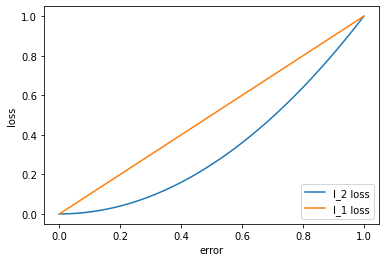

In [251]:
error = np.linspace(0.0, 1.0, 100)
plt.plot(error, error**2, label='l_2 loss')
plt.plot(error, np.abs(error), label='l_1 loss')
plt.xlabel('error')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [252]:
# first compute the error, the inner part of the summation.
# This should be the l1-norm or l2-norm of the distance
# between each color channel.

#l2 loss function - tf.square_difference
#l1 loss function tf.abs
#only refer to Y and Y_pred
def distance(p1, p2):
    return tf.abs(p1 - p2)
def distance2(p1,p2):
    return tf.square_difference(p1,p2)

In [253]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

In [254]:
#create an optimizer
#https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/AdamOptimizer
#optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
#tried exponents of  10 on learning rate
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [255]:
# Create parameters
n_iterations = 300
batch_size = 50
#create a session
sess = tf.Session()

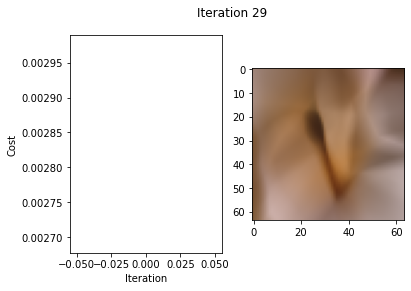

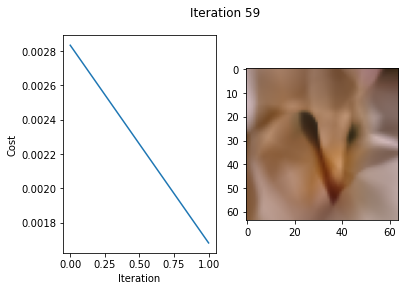

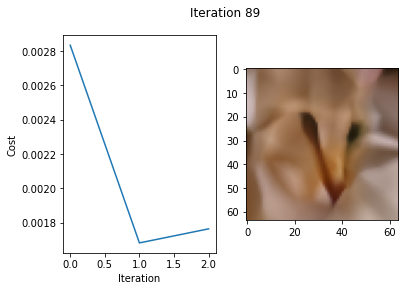

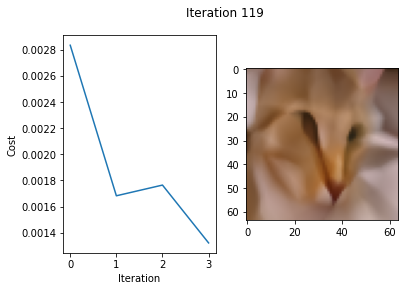

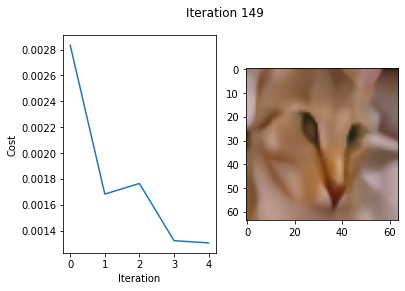

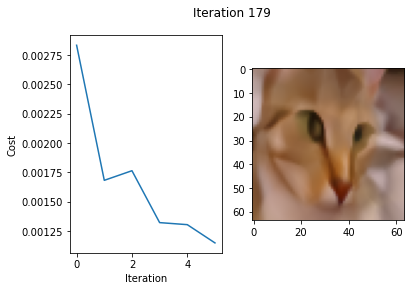

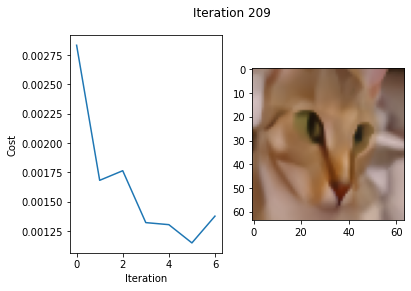

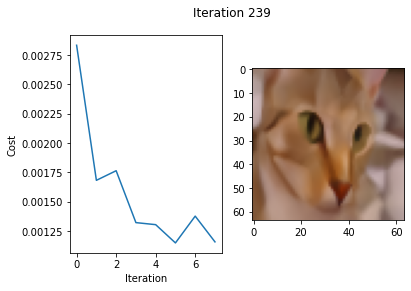

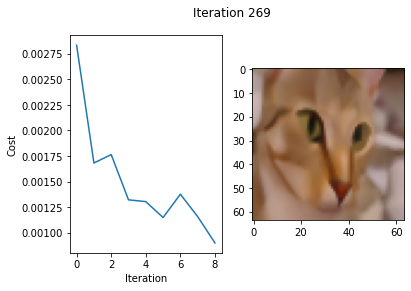

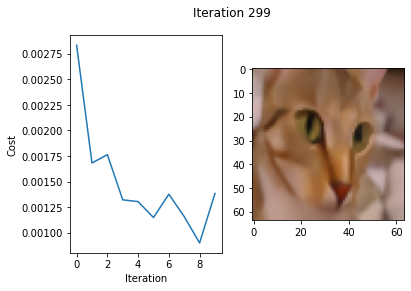

In [256]:
# Initialize all the variables and run the operation with the session
sess.run(tf.global_variables_initializer())

# Optimize over a few iterations, each time following the gradient
# a little at a time
imgs = []
costs = []
gif_step = n_iterations // 10
step_i = 0

for it_i in range(n_iterations):
    # Get a random sampling of the dataset
    idxs = np.random.permutation(range(len(xs)))
    
    # The number of batches we have to iterate over
    n_batches = len(idxs) // batch_size
    
    # Now iterate over our stochastic minibatches:
    for batch_i in range(n_batches):
        # Get just minibatch amount of data
        idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
        
        # And optimize, also returning the cost so we can monitor
        # how our optimization is doing.
        training_cost = sess.run(
            [cost, optimizer],
            feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})[0]
    
    # Also, every 20 iterations, we'll draw the prediction of our
    # input xs, which should try to recreate our image!
    if (it_i + 1) % gif_step == 0:
        costs.append(training_cost / n_batches)
        ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
        img1 = np.clip(ys_pred.reshape(imgCat.shape), 0, 1)
        img2 = np.clip(ys_pred.reshape(imgCoffee.shape), 0, 1)
        img = np.concatenate((img1[:32], img2[32:]))
        imgs.append(img)
        # Plot the cost over time
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(costs)
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Cost')
        ax[1].imshow(img)
        fig.suptitle('Iteration {}'.format(it_i))
        plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


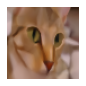

In [257]:
# Save the images as a GIF
_ = gif.build_gif(imgs, saveto='cat_single_deepWide.gif', show_gif=False) #会报错

# Given a set of images, show an animation.
def animate(images):
  images = np.array(images)
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images)
  return embed.embed_file('./animation.gif')


In [258]:
# display the GIF 
ipyd.Image(url='cat_single_deepWide.gif?{}'.format(np.random.rand()),
           height=200, width=200)

In [170]:
ipyd.Image(url='cat_single_lr10.gif?{}'.format(np.random.rand()),
           height=200, width=200)

In [174]:
ipyd.Image(url='cat_single_lr10_batch200.gif?{}'.format(np.random.rand()),
           height=200, width=200)

In [190]:
ipyd.Image(url='cat_single_shallowWide.gif?{}'.format(np.random.rand()),
           height=200, width=200)

In [203]:
ipyd.Image(url='cat_single_deepNarrow.gif?{}'.format(np.random.rand()),
           height=200, width=200)

----------------